In [1]:
import pandas as pd
import numpy as np
# 数据加载
pd.set_option('display.max_columns', None)
df = pd.read_csv('./cs-training.csv')
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [2]:
#去掉第一列
df_train = df.iloc[:,1:]
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


违约率：0.06684


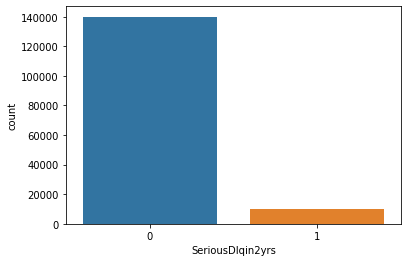

In [3]:
# 违约率和缺失值可视化
import matplotlib.pyplot as plt
import seaborn as sns
# SeriousDlqin2yrs 违约率可视化, countplot 以bar 的形式展示每个类别的数量
sns.countplot(x='SeriousDlqin2yrs', data = df_train)
print('违约率：{}'.format(df_train['SeriousDlqin2yrs'].sum()/ len(df_train)))

In [4]:
# 缺失值比例
null_num = df_train.isnull().sum()
pd.DataFrame({'列名':null_num.index, '缺失值个数':null_num.values, '比例': null_num.values/len(df_train) })

,列名,缺失值个数,比例
0,SeriousDlqin2yrs,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,29731,0.198207
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


/home/stu_13768580091/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='Density'>

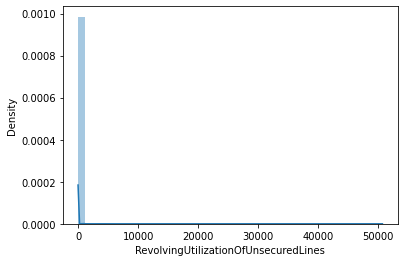

In [5]:
# 字段RevolvingUtilizationOfUnsecuredLines探索
print(df_train['RevolvingUtilizationOfUnsecuredLines'].describe())
# 直方图
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [6]:
# 缺失值填充
df_train.info()
# 使用中位数进行缺失值填充
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# 数据分箱

In [7]:
# 对于age字段， 分成6段[-math.inf, 25, 40, 50, 60, 70, math.inf]
import math
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['age'].value_counts()
df_train['age_bins'] = pd.cut(df_train['age'], bins=age_bins)
df_train[['age', 'age_bins']]

,age,age_bins
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [8]:
# 对于NumberOfDependents （家属人数）字段，分成6段[-math.inf, 2, 4, 6, 8, 10, math.inf]
dependent_bins = [-math.inf, 2, 4, 6, 8, 10, math.inf]
df_train['NumberOfDependents_bins'] = pd.cut(df_train['NumberOfDependents'], bins=dependent_bins)
df_train[['NumberOfDependents', 'NumberOfDependents_bins']]

,NumberOfDependents,NumberOfDependents_bins
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [9]:
# 对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
# [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['NumberOfTime30-59DaysPastDueNotWorse_bins'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['NumberOfTime60-89DaysPastDueNotWorse_bins'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)
df_train['NumberOfTimes90DaysLate_bins'] = pd.cut(df_train['NumberOfTimes90DaysLate'], bins=dpd_bins)

In [10]:
# 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 
# 分成5段，采用等频的方式qcut进行分箱, duplicates='drop'表示重复的边界合并（相同的分箱合并）

df_train['RevolvingUtilizationOfUnsecuredLines_bins'] = pd.qcut(df['RevolvingUtilizationOfUnsecuredLines'], q=5, duplicates='drop')
df_train['DebtRatio_bins'] = pd.qcut(df['DebtRatio'], q=5, duplicates='drop')
df_train['MonthlyIncome_bins'] = pd.qcut(df['MonthlyIncome'], q=5)
df_train['NumberOfOpenCreditLinesAndLoans_bins'] = pd.qcut(df['NumberOfOpenCreditLinesAndLoans'], q=5, duplicates='drop')
df_train['NumberRealEstateLoansOrLines_bins'] = pd.qcut(df['NumberRealEstateLoansOrLines'], q=5, duplicates='drop')

In [11]:
# 查看等频分箱结果
df_train[['RevolvingUtilizationOfUnsecuredLines','RevolvingUtilizationOfUnsecuredLines_bins', 'DebtRatio', 'DebtRatio_bins', \
          'MonthlyIncome','MonthlyIncome_bins','NumberOfOpenCreditLinesAndLoans','NumberOfOpenCreditLinesAndLoans_bins',\
         'NumberRealEstateLoansOrLines','NumberRealEstateLoansOrLines_bins']]

,RevolvingUtilizationOfUnsecuredLines,RevolvingUtilizationOfUnsecuredLines_bins,DebtRatio,DebtRatio_bins,MonthlyIncome,MonthlyIncome_bins,NumberOfOpenCreditLinesAndLoans,NumberOfOpenCreditLinesAndLoans_bins,NumberRealEstateLoansOrLines,NumberRealEstateLoansOrLines_bins
0,0.766127,"(0.699, 50708.0]",0.802982,"(0.468, 4.0]",9120.0,"(9083.0, 3008750.0]",13,"(12.0, 58.0]",6,"(2.0, 54.0]"
1,0.957151,"(0.699, 50708.0]",0.121876,"(-0.001, 0.134]",2600.0,"(-0.001, 3000.0]",4,"(-0.001, 4.0]",0,"(-0.001, 1.0]"
2,0.658180,"(0.271, 0.699]",0.085113,"(-0.001, 0.134]",3042.0,"(3000.0, 4544.2]",2,"(-0.001, 4.0]",0,"(-0.001, 1.0]"
3,0.233810,"(0.0832, 0.271]",0.036050,"(-0.001, 0.134]",3300.0,"(3000.0, 4544.2]",5,"(4.0, 6.0]",0,"(-0.001, 1.0]"
4,0.907239,"(0.699, 50708.0]",0.024926,"(-0.001, 0.134]",63588.0,"(9083.0, 3008750.0]",7,"(6.0, 9.0]",1,"(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,"(0.0192, 0.0832]",0.225131,"(0.134, 0.287]",2100.0,"(-0.001, 3000.0]",4,"(-0.001, 4.0]",1,"(-0.001, 1.0]"
149996,0.299745,"(0.271, 0.699]",0.716562,"(0.468, 4.0]",5584.0,"(4544.2, 6300.0]",4,"(-0.001, 4.0]",1,"(-0.001, 1.0]"
149997,0.246044,"(0.0832, 0.271]",3870.000000,"(4.0, 329664.0]",5400.0,NaN,18,"(12.0, 58.0]",1,"(-0.001, 1.0]"
149998,0.000000,"(-0.001, 0.0192]",0.000000,"(-0.001, 0.134]",5716.0,"(4544.2, 6300.0]",4,"(-0.001, 4.0]",0,"(-0.001, 1.0]"


In [12]:
df_train.isnull().sum()

SeriousDlqin2yrs                                 0
RevolvingUtilizationOfUnsecuredLines             0
age                                              0
NumberOfTime30-59DaysPastDueNotWorse             0
DebtRatio                                        0
MonthlyIncome                                    0
NumberOfOpenCreditLinesAndLoans                  0
NumberOfTimes90DaysLate                          0
NumberRealEstateLoansOrLines                     0
NumberOfTime60-89DaysPastDueNotWorse             0
NumberOfDependents                               0
age_bins                                         0
NumberOfDependents_bins                          0
NumberOfTime30-59DaysPastDueNotWorse_bins        0
NumberOfTime60-89DaysPastDueNotWorse_bins        0
NumberOfTimes90DaysLate_bins                     0
RevolvingUtilizationOfUnsecuredLines_bins        0
DebtRatio_bins                                   0
MonthlyIncome_bins                           29731
NumberOfOpenCreditLinesAndLoans

### 疑问：为什么MonthlyIncome变量分箱后会有变量分箱为空？

In [13]:
bin_cols = ['age_bins', 'NumberOfDependents_bins', 'NumberOfTime30-59DaysPastDueNotWorse_bins', \
            'NumberOfTime60-89DaysPastDueNotWorse_bins', 'NumberOfTimes90DaysLate_bins', 'RevolvingUtilizationOfUnsecuredLines_bins',\
            'DebtRatio_bins', 'MonthlyIncome_bins', 'NumberOfOpenCreditLinesAndLoans_bins', 'NumberRealEstateLoansOrLines_bins']

In [14]:
# 计算IV，衡量自变量的预测能力
def cal_IV(df, feature, target):
    lst = []
    cols = ['feature', 'val', 'num', 'bad_num'] # 分别代表 字段名称、分箱数值段、在该分箱数值段的总个数、在该分箱数值中bad的个数
    for i in range(df[feature].nunique()): #nunique = unique的个数
        val = list(df[feature].unique())[i]
        # 统计feature，feature_value， 这个value的个数，这个value导致target为1的个数
        lst.append([feature, val])
        temp1 = df[df[feature]==val].count()[feature] # 这个value的总个数
        temp2 = df[(df[feature]==val) & (df[target]==1)].count()[feature] # 这个value导致target为1的个数
        #print(feature, val, temp1, temp2)
        lst.append([feature, val, temp1, temp2])
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['bad_num']>0]
    data['num_ratio'] = data['num'] / data['num'].sum()
    data['bad_ratio'] = data['bad_num'] / data['num']
    data['bad_margin_rate'] = data['bad_num'] / data['bad_num'].sum()
    data['good_margin_rate'] = (data['num'] - data['bad_num'])/(data['num'].sum() - data['bad_num'].sum())
    data['WOE'] = np.log(data['bad_margin_rate']/data['good_margin_rate'])
    data['IV'] = data['WOE'] * (data['bad_margin_rate'] - data['good_margin_rate'])
    
    data = data.sort_values(by=['feature', 'val'])
    return data['IV'].sum()

In [15]:
#cal_IV(df_train, 'age_bins', 'SeriousDlqin2yrs')
# 统计所有字段的IV值
for col in bin_cols:
    IV = cal_IV(df_train, col, 'SeriousDlqin2yrs')
    print(col, IV)
    

age_bins 0.24041120302785984
NumberOfDependents_bins 0.01450836007644442
NumberOfTime30-59DaysPastDueNotWorse_bins 0.49244477457019803
NumberOfTime60-89DaysPastDueNotWorse_bins 0.2665587583516951
NumberOfTimes90DaysLate_bins 0.49160685733515563
RevolvingUtilizationOfUnsecuredLines_bins 1.0596188771423887
DebtRatio_bins 0.05948761145809681
MonthlyIncome_bins 0.09578345329829879
NumberOfOpenCreditLinesAndLoans_bins 0.04802315528985505
NumberRealEstateLoansOrLines_bins 0.0120914141106244


# 筛选出IV>0.1 的变量
age_bins、NumberOfTime30-59DaysPastDueNotWorse_bins、NumberOfTime60-89DaysPastDueNotWorse_bins、 NumberOfTimes90DaysLate_bins、RevolvingUtilizationOfUnsecuredLines_bins

In [51]:
# 计算字段的WOE特征值
def cal_WOE(df, features, target):
    for feature in features:
        df_woe = df.groupby(feature).agg({target:['sum', 'count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        #print(df_woe.columns)
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns={target+'sum': 'bad_num', target+'count': 'num'})
        #print(df_woe)
       
        df_woe['good_num'] = df_woe['num'] - df_woe['bad_num']
        df_woe = df_woe[[feature, 'good_num', 'bad_num']]
        
        df_woe['bad_margin_rate'] = df_woe['bad_num'] / df_woe['bad_num'].sum()
        df_woe['good_margin_rate'] = df_woe['good_num'] / df_woe['good_num'].sum()
        
        #计算woe
        df_woe['woe'] = np.log1p(df_woe['bad_margin_rate']/df_woe['good_margin_rate'])
        # 在后面拼接上 _feature, 比如_age
        df_woe.columns = [c if c == feature else c + '_' + feature for c in list(df_woe.columns.values)]
        # 拼接
        df = df.merge(df_woe, on=feature, how='left')
    return df

In [52]:
feature_bin_cols = ['age_bins', 'NumberOfTime30-59DaysPastDueNotWorse_bins', 'NumberOfTime60-89DaysPastDueNotWorse_bins',\
                'NumberOfTimes90DaysLate_bins', 'RevolvingUtilizationOfUnsecuredLines_bins']
feature_cols = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse',\
                'NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines']

# 计算这些特征的WOE值
df_woe = cal_WOE(df_train, feature_bin_cols,  'SeriousDlqin2yrs')
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_bins,NumberOfDependents_bins,NumberOfTime30-59DaysPastDueNotWorse_bins,NumberOfTime60-89DaysPastDueNotWorse_bins,NumberOfTimes90DaysLate_bins,RevolvingUtilizationOfUnsecuredLines_bins,DebtRatio_bins,MonthlyIncome_bins,NumberOfOpenCreditLinesAndLoans_bins,NumberRealEstateLoansOrLines_bins,good_num_age_bins,bad_num_age_bins,bad_margin_rate_age_bins,good_margin_rate_age_bins,woe_age_bins,good_num_NumberOfTime30-59DaysPastDueNotWorse_bins,bad_num_NumberOfTime30-59DaysPastDueNotWorse_bins,bad_margin_rate_NumberOfTime30-59DaysPastDueNotWorse_bins,good_margin_rate_NumberOfTime30-59DaysPastDueNotWorse_bins,woe_NumberOfTime30-59DaysPastDueNotWorse_bins,good_num_NumberOfTime60-89DaysPastDueNotWorse_bins,bad_num_NumberOfTime60-89DaysPastDueNotWorse_bins,bad_margin_rate_NumberOfTime60-89DaysPastDueNotWorse_bins,good_margin_rate_NumberOfTime60-89DaysPastDueNotWorse_bins,woe_NumberOfTime60-89DaysPastDueNotWorse_bins,good_num_NumberOfTimes90DaysLate_bins,bad_num_NumberOfTimes90DaysLate_bins,bad_margin_rate_NumberOfTimes90DaysLate_bins,good_margin_rate_NumberOfTimes90DaysLate_bins,woe_NumberOfTimes90DaysLate_bins,good_num_RevolvingUtilizationOfUnsecuredLines_bins,bad_num_RevolvingUtilizationOfUnsecuredLines_bins,bad_margin_rate_RevolvingUtilizationOfUnsecuredLines_bins,good_margin_rate_RevolvingUtilizationOfUnsecuredLines_bins,woe_RevolvingUtilizationOfUnsecuredLines_bins
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(9083.0, 3008750.0]","(12.0, 58.0]","(2.0, 54.0]",32144,2893,0.288550,0.229643,0.813822,3379,1219,0.121584,0.024140,1.797837,139094,9033,0.900958,0.993713,0.645352,138586,8319,0.829743,0.990084,0.608707,24037,5963,0.594754,0.171725,1.495914
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3000.0]","(-0.001, 4.0]","(-0.001, 1.0]",28773,3296,0.328745,0.205560,0.955231,134601,7450,0.743068,0.961614,0.572521,139094,9033,0.900958,0.993713,0.645352,138586,8319,0.829743,0.990084,0.608707,24037,5963,0.594754,0.171725,1.495914
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(3000.0, 4544.2]","(-0.001, 4.0]","(-0.001, 1.0]",28773,3296,0.328745,0.205560,0.955231,134601,7450,0.743068,0.961614,0.572521,139094,9033,0.900958,0.993713,0.645352,138586,8319,0.829743,0.990084,0.608707,27893,2107,0.210154,0.199273,0.720083
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(3000.0, 4544.2]","(4.0, 6.0]","(-0.001, 1.0]",28773,3296,0.328745,0.205560,0.955231,134601,7450,0.743068,0.961614,0.572521,139094,9033,0.900958,0.993713,0.645352,138586,8319,0.829743,0.990084,0.608707,29123,877,0.087473,0.208060,0.350952
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(9083.0, 3008750.0]","(6.0, 9.0]","(-0.001, 1.0]",32144,2893,0.288550,0.229643,0.813822,134601,7450,0.743068,0.961614,0.572521,139094,9033,0.900958,0.993713,0.645352,138586,8319,0.829743,0.990084,0.608707,24037,5963,0.594754,0.171725,1.495914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3000.0]","(-0.001, 4.0

In [53]:
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
df_woe[woe_cols]


,woe_age_bins,woe_NumberOfTime30-59DaysPastDueNotWorse_bins,woe_NumberOfTime60-89DaysPastDueNotWorse_bins,woe_NumberOfTimes90DaysLate_bins,woe_RevolvingUtilizationOfUnsecuredLines_bins
0,0.813822,1.797837,0.645352,0.608707,1.495914
1,0.955231,0.572521,0.645352,0.608707,1.495914
2,0.955231,0.572521,0.645352,0.608707,0.720083
3,0.955231,0.572521,0.645352,0.608707,0.350952
4,0.813822,0.572521,0.645352,0.608707,1.495914
...,...,...,...,...,...
149995,0.279404,0.572521,0.645352,0.608707,0.211221
149996,0.813822,0.572521,0.645352,0.608707,0.720083
149997,0.651655,0.572521,0.645352,0.608707,0.350952
149998,0.955231,0.572521,0.645352,0.608707,0.243890


In [54]:
# 得到WOE规则
df_bin_to_woe = pd.DataFrame(columns=['features', 'bin', 'woe'])
for f in feature_cols:
    b =  f + '_bins'
    w = 'woe_' + f + '_bins'
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe', 'bin']
    df['features'] = f
    df = df[['features', 'bin', 'woe']]
    df_bin_to_woe = pd.concat([df_bin_to_woe, df])
df_bin_to_woe

,features,bin,woe
0,age,"(40.0, 50.0]",0.813822
1,age,"(25.0, 40.0]",0.955231
5,age,"(70.0, inf]",0.279404
6,age,"(50.0, 60.0]",0.651655
15,age,"(60.0, 70.0]",0.406848
19,age,"(-inf, 25.0]",1.013134
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111


# 逻辑回归建模

In [103]:
# 数据集切分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_train['SeriousDlqin2yrs'], test_size=0.2, random_state=33)
print('bad rate is ',y_train.mean())

bad rate is  0.06686666666666667


In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=33,class_weight='balanced').fit(x_train, y_train)
print(model.score(x_test,y_test))


0.8014666666666667


In [105]:
from sklearn.metrics import f1_score, roc_auc_score
y_pred = model.predict(x_test)
print(f1_score(y_pred, y_test))
print(roc_auc_score(y_pred, y_test))

0.32102143182854537
0.5912029915983699


In [106]:
def lr_cv(max_iter, C):
    result = cross_val_score(LogisticRegression(C=C, max_iter=max_iter), x_train, y_train, scoring='f1', cv=5).mean()
    return result

In [87]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression(random_state=33,class_weight='balanced')
print('f1 score:',cross_val_score(model, x_train, y_train, cv=5, scoring='f1').mean())
print('Accuracy score:',cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean())

f1 score: 0.3140258308444176
Accuracy score: 0.7981666666666667


In [107]:
# 使用贝叶斯超参数优化
from bayes_opt import BayesianOptimization
lr_op = BayesianOptimization(
        f = lr_cv,
        pbounds = {'C':(0.01,10),
                  'max_iter': (50,500)
                 }
    )
lr_op.maximize()
print(lr_op.max)

|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
|  1        |  0.2035   |  4.076    |  373.3    |
|  2        |  0.2035   |  4.92     |  109.1    |
|  3        |  0.2035   |  8.507    |  491.4    |
|  4        |  0.2035   |  5.263    |  194.5    |
|  5        |  0.2035   |  8.744    |  100.8    |


ValueError: array must not contain infs or NaNs

In [116]:
C = 0.4822633438176657
max_iter=177
model = LogisticRegression(random_state=33, class_weight='balanced', C=C, max_iter=max_iter)
print('f1 score:',cross_val_score(model, x_train, y_train, cv=5, scoring='f1').mean())
print('Accuracy score:',cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean())
model.fit(x_train, y_train)

f1 score: 0.3140258308444176
Accuracy score: 0.7981666666666667


LogisticRegression(C=0.4822633438176657, class_weight='balanced', max_iter=177,
                   random_state=33)

In [137]:
# 求评分卡模型的A,B
# A = P0 + B*ln(θ0)
# B = PDO/ln2
# 假设odds=1的时候，特定分数为650

A = 650
B = 20

def generate_scorecard(model_coef, binning_df, features, B):
    lst=[]
    cols = ['Variable', 'Binning', 'Score']
    # 模型系数
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        # 得到这个feature的WOE规则
        df = binning_df[binning_df['features'] == f]
        for index, row in df.iterrows():
            lst.append([f, row['bin'], int(round(-coef[i] * row['woe'] * B))])
    data = pd.DataFrame(lst, columns=cols)
    return data

#
score_card = generate_scorecard(model.coef_, df_bin_to_woe, feature_cols, B)
score_card

,Variable,Binning,Score
0,age,"(40.0, 50.0]",-20
1,age,"(25.0, 40.0]",-23
2,age,"(70.0, inf]",-7
3,age,"(50.0, 60.0]",-16
4,age,"(60.0, 70.0]",-10
5,age,"(-inf, 25.0]",-25
6,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-38
7,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-12
8,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-46
9,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-52


In [138]:
# 对于每个字段按照降序排序，查看规则
sorted_scorecard = score_card.groupby('Variable').apply(lambda x:x.sort_values('Score', ascending=False))
sorted_scorecard

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
                                     14  NumberOfTime30-59DaysPastDueNotWorse   
                                     15  NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     11  NumberOfTime30-59DaysPastDueNotWorse   
                                     13  NumberOfTime30-59DaysPastDueNotWorse   
                                     12  NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 25  NumberOfTime60-89DaysPastDueNotWorse   
                                     16  NumberOfTime60-89DaysPastDueNotWorse   
                                     17  NumberOfTime60-89DaysPastDueNotWorse   
                                     24  NumberOfTime60-89DaysPastDueNotWorse   
                                     20  NumberOfTime60-89DaysPastDueNotWorse   
                                     23  NumberOfTime60-89DaysPastDueNotWorse   
                                     19  NumberOfTime60-89DaysPastDueNotWorse   
                                     18  NumberOfTime60-89DaysPastDueNotWorse   
                                     21  NumberOfTime60-89DaysPastDueNotWorse   
                                     22  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              26               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
                                     31               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     33               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
                                     30               NumberOfTimes90DaysLate   
                                     35               NumberOfTimes90DaysLate   
                                     32               NumberOfTimes90DaysLate   
                                     34               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 40  RevolvingUtilizationOfUnsecuredLines   
                                     39  RevolvingUtilizationOfUnsecuredLines   
                                     38  RevolvingUtilizationOfUnsecuredLines   
                                     37  RevolvingUtilizationOfUnsecuredLines   
                                     36  RevolvingUtilizationOfUnsecuredLines   
age                                  2                                    age   
                                     4                                    age   
                                     3                                    age   
                                     0                                    age   
                                     1                                    age   
                                     5                                    age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 7        (-inf, 1.0]    -12  
                                     6         (1.0, 2.0]    -38  
                                     14        (7.0, 8.0]    -43  
                                     15        (8.0, 9.0]    -44  
                                     8         (2.0, 3.0]    -46  
                                     9         (3.0, 4.0]    -52  
                                     10        (4

In [139]:
# 把数据映射到分箱中
def str2int(s):
    if s == '-inf':
        return -999999
    if s == 'inf':
        return 999999
    return float(s)

# 将value映射到bin
def map_value2bin(feature_value, feature2bin):
    for index, row in feature2bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0]=='('
        right_open = bins[-1] == ')'
        binnings = bins[1:-1].split(',')
        in_range = True
        temp = str2int(binnings[0])
        temp2 = str2int(binnings[1])
        # 检查左括号
        if left_open:
            if feature_value <= temp:
                in_range = False
        else:
            if feature_value < temp:
                in_range = False
        # 检查右括号
        if right_open:
            if feature_value >= temp2:
                in_range = False
        else:
            if feature_value > temp2:
                in_range = False
        if in_range:
            return row['Binning']
        

In [140]:
# df为待转换样本， scorecard为评分卡规则
def map2score(df, score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        # 取出评分规则
        feature2bin = score_card[score_card['Variable'] == col]
        # 取出具体的feature_value
        feature_value = df[col]
        selected_bin = map_value2bin(feature_value, feature2bin)
        temp_score = feature2bin[feature2bin['Binning'] == selected_bin]
        score += temp_score['Score'].values[0]
    return score

In [141]:
def cal_score(df, score_card, A):
    # map2score 按评分卡规则进行计算
    df['Score'] = df.apply(map2score, args=(score_card,), axis = 1)
    df['Score'] = df['Score'].astype(int)
    df['Score'] = df['Score'] + A
    return df

In [144]:
score_card['Score'] = score_card['Score'] - score_card['Score'].min()

In [149]:
# 随机选择Good的5个人
good_sample = df_train[df_train['SeriousDlqin2yrs'] == 0].sample(5)
good_sample = good_sample[feature_cols]
# 对5个好人进行评分
cal_score(good_sample, score_card, A)

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,Score
69503,58,0,0,0,0.658688,936
18472,31,0,0,0,0.944407,906
95828,56,0,0,0,0.516813,936
125938,43,0,0,0,0.000000,947
10586,58,0,0,1,1.000000,913


In [148]:
# 随机选择Bad的5个人
bad_sample = df_train[df_train['SeriousDlqin2yrs'] == 1].sample(5)
bad_sample = bad_sample[feature_cols]
# 对5个坏人进行评分
cal_score(bad_sample, score_card, A)

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,Score
5089,39,4,0,0,0.942073,866
118122,73,1,1,5,1.671791,877
62163,43,0,0,0,1.000000,909
47218,33,0,0,0,0.738772,906
55284,62,3,0,0,1.026403,885
